# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [388]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearnGunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [389]:
# Load data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [390]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [391]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [392]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX001046,AC00362,NaN,2023-05-10 16:27:51,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 8:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

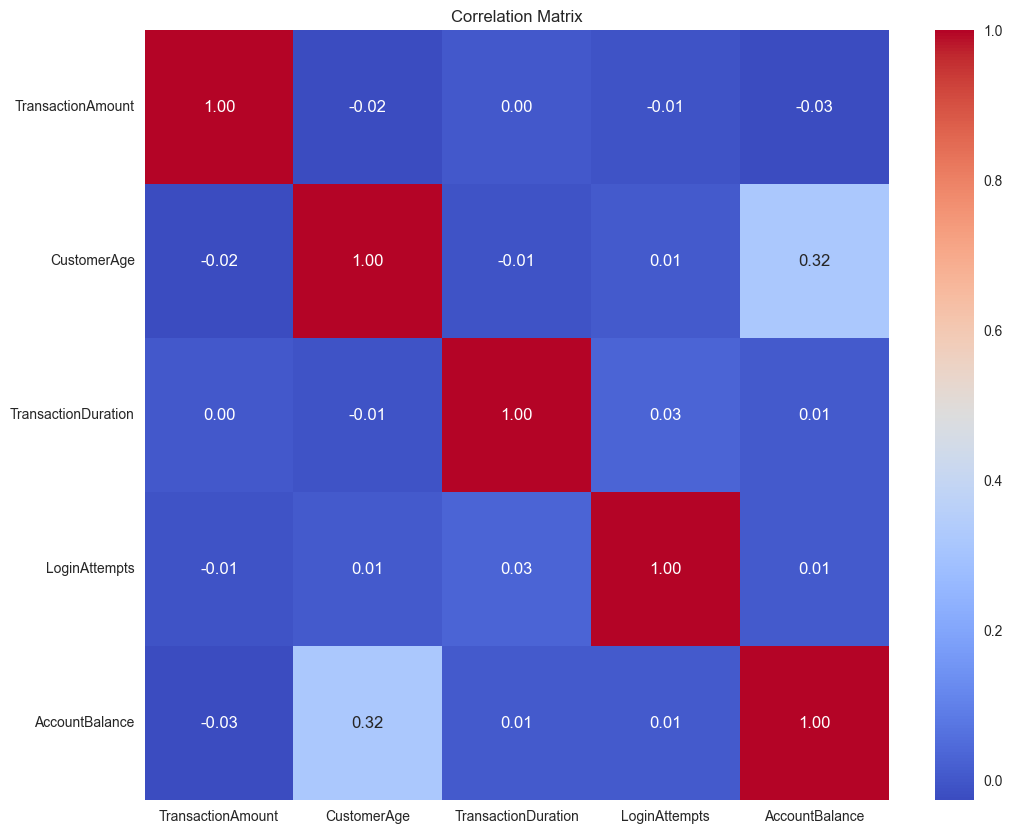

In [393]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

plt.yticks(rotation=0, ha="right", fontsize=10)
plt.show()

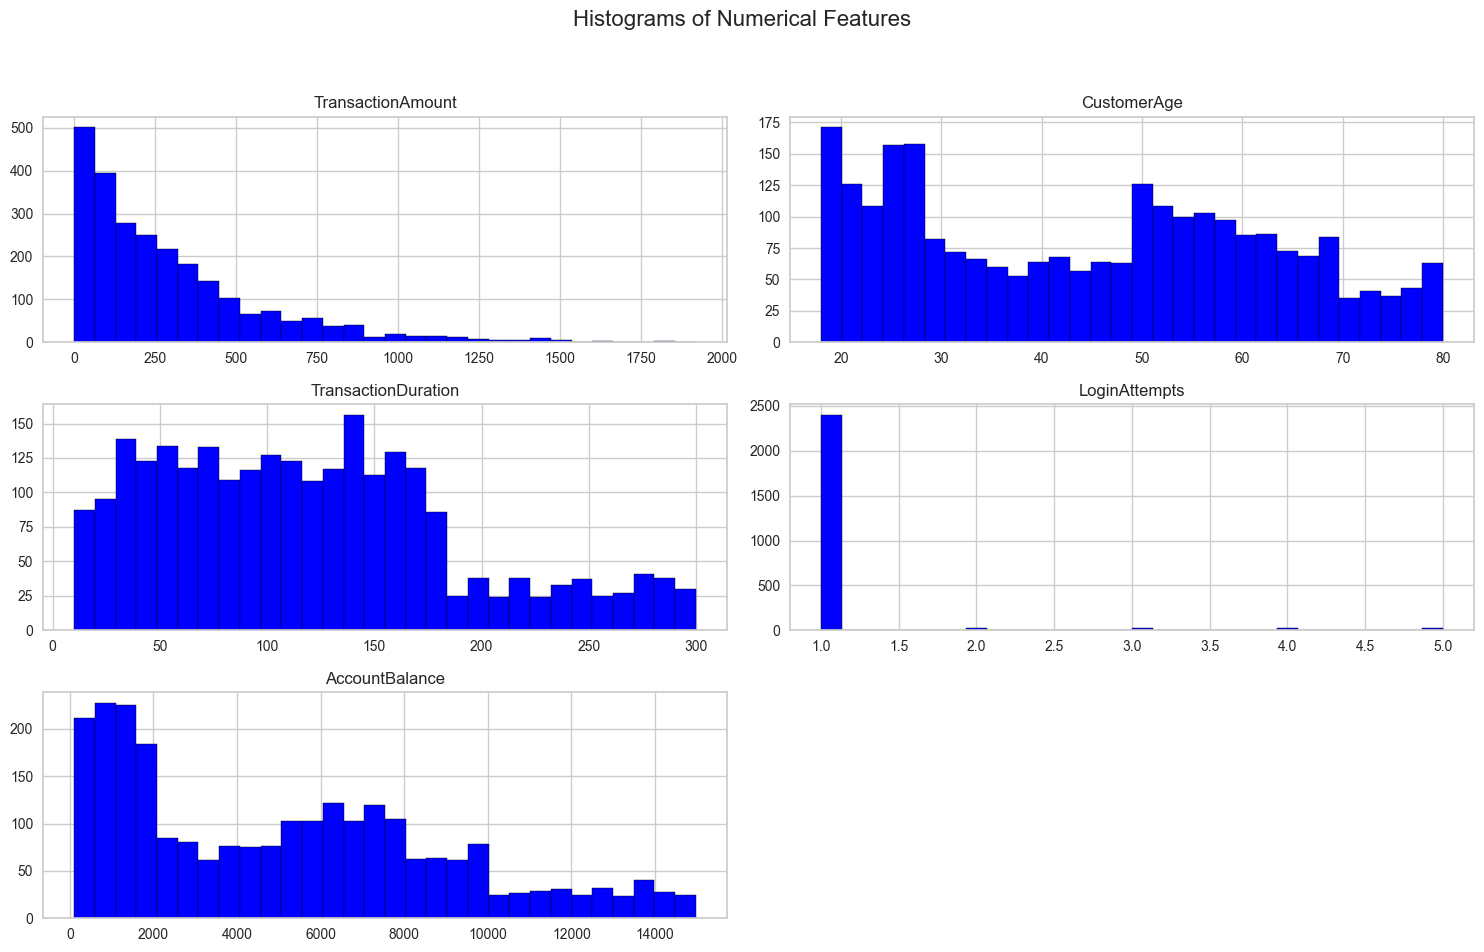

In [394]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

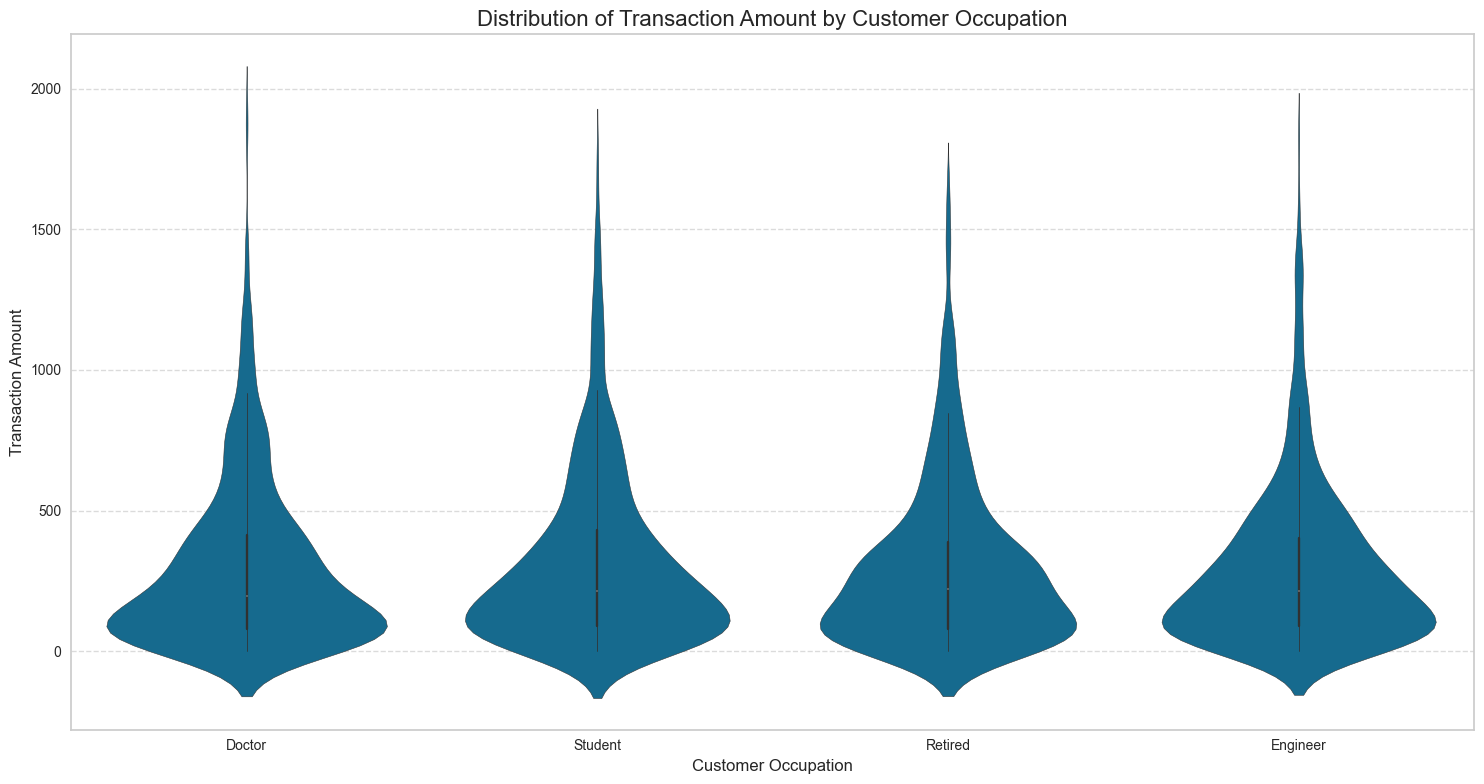

In [395]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

plt.figure(figsize=(15, 8))
sns.violinplot(x='CustomerOccupation', y='TransactionAmount', data=df)
plt.title('Distribution of Transaction Amount by Customer Occupation', fontsize=16)
plt.xlabel('Customer Occupation', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [396]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64

In [397]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [398]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
from sklearn.preprocessing import MinMaxScaler, StandardScaler, minmax_scale

scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [399]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'])
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [400]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df_lencoder = df.copy()
for col in categorical_cols:
    df_lencoder[col] = lencoder.fit_transform(df_lencoder[col].astype(str))
df_lencoder.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [401]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df_lencoder.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [402]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_lencoder.fillna(df_lencoder.median(), inplace=True)
print(df_lencoder.isnull().sum())

TransactionAmount          0
PreviousTransactionDate    0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
TransactionDate            0
dtype: int64


In [403]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_lencoder.drop_duplicates(inplace=True)
print(df_lencoder.duplicated().sum())

0


In [404]:
df_lencoder[numerical_cols]

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,0.838710,0.244828,0.0,0.336832
1,0.195940,0.806452,0.451724,0.0,0.918055
2,0.065680,0.016129,0.158621,0.0,0.068637
3,0.096016,0.129032,0.051724,0.0,0.569198
4,0.006874,0.435484,0.648276,0.0,0.492591
...,...,...,...,...,...
2509,0.014785,0.612903,0.468966,0.0,0.220590
2510,0.096782,0.080645,0.031034,0.0,0.112636
2511,0.126545,0.096774,0.286207,0.0,0.002017
2524,0.120833,0.306452,0.141379,0.0,0.442881


In [405]:
df_lencoder[categorical_cols]

,PreviousTransactionDate,TransactionType,Location,Channel,CustomerOccupation,TransactionDate
0,680,1,36,0,0,105
1,1178,1,15,0,0,192
2,1262,1,23,2,3,41
3,818,1,33,2,3,163
4,1939,0,1,2,3,16
...,...,...,...,...,...,...
2509,1531,1,36,1,2,136
2510,376,1,10,2,3,358
2511,298,0,17,2,3,86
2524,2461,1,29,0,1,174


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [406]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
for col in numerical_cols:
    Q1 = df_lencoder[col].quantile(0.25)
    Q3 = df_lencoder[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_lencoder[(df_lencoder[col] < lower_bound) | (df_lencoder[col] > upper_bound)]
    df_lencoder = df_lencoder.drop(outliers.index)

df_lencoder

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,0.435484,3,0.648276,0.0,0.492591,16
...,...,...,...,...,...,...,...,...,...,...,...
2509,0.014785,1531,1,36,1,0.612903,2,0.468966,0.0,0.220590,136
2510,0.096782,376,1,10,2,0.080645,3,0.031034,0.0,0.112636,358
2511,0.126545,298,0,17,2,0.096774,3,0.286207,0.0,0.002017,86
2524,0.120833,2461,1,29,0,0.306452,1,0.141379,0.0,0.442881,174


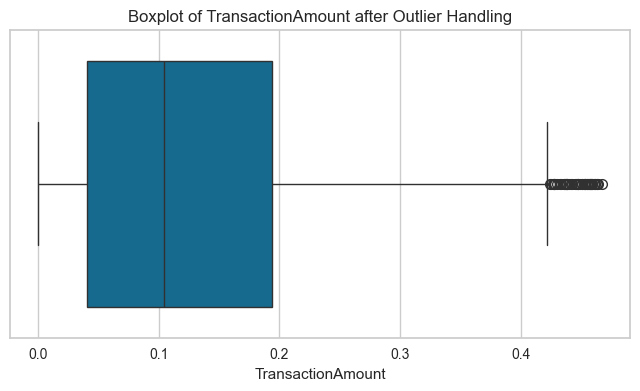

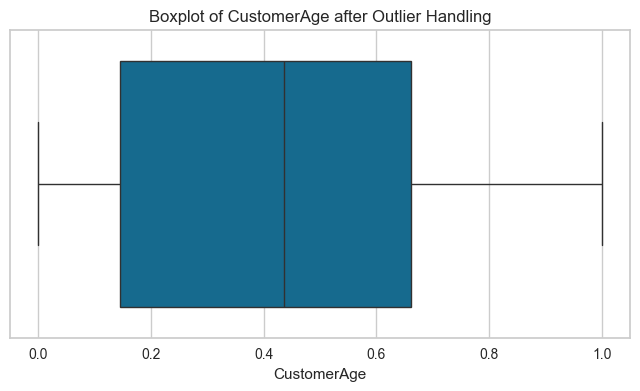

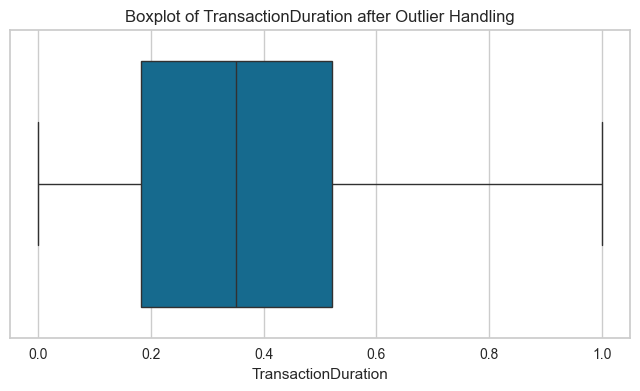

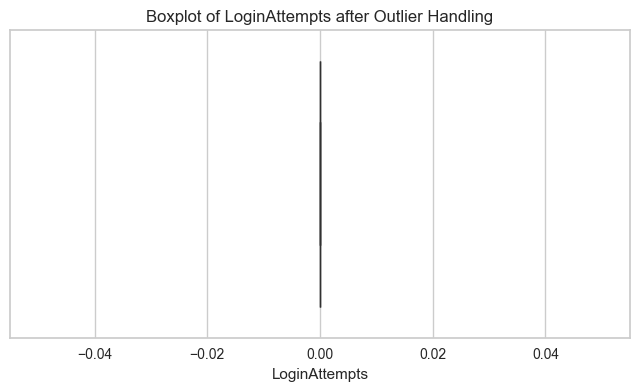

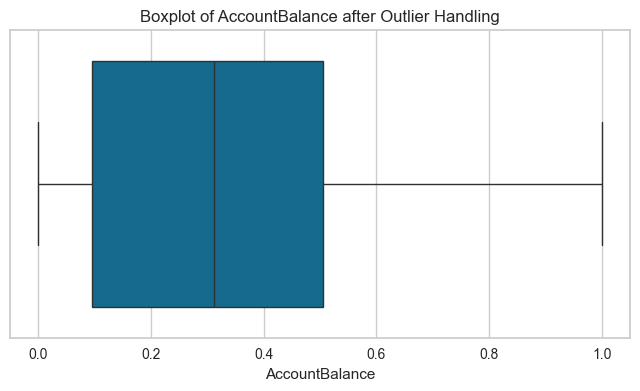

In [407]:
# Visualisasi boxplot untuk memastikan outlier sudah tertangani
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_lencoder[col])
    plt.title(f'Boxplot of {col} after Outlier Handling')
    plt.show()

In [408]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

bin = pd.cut(df_lencoder['CustomerAge'], bins=[0, 18, 35, 50, 65, 100], labels=['Child', 'Youth', 'Adult', 'Middle Age', 'Senior'])
df_lencoder['CustomerAgeBinned'] = bin
df_lencoder['CustomerAgeBinned'] = lencoder.fit_transform(df_lencoder['CustomerAgeBinned'])
df_lencoder.head()


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,CustomerAgeBinned
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,0
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,0
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0
4,0.006874,1939,0,1,2,0.435484,3,0.648276,0.0,0.492591,16,0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [409]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_lencoder.describe(include='all')

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,CustomerAgeBinned
count,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.0,2286.000000,2286.000000,2286.000000
mean,0.132748,1253.901575,0.788714,21.354768,1.010499,0.429677,1.530621,0.375470,0.0,0.337391,180.723972,0.021435
std,0.112915,723.862593,0.439290,12.429289,0.827786,0.284662,1.147990,0.239815,0.0,0.259560,103.739332,0.144860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.040790,631.250000,1.000000,11.000000,0.000000,0.145161,1.000000,0.182759,0.0,0.095703,92.000000,0.000000
50%,0.104101,1250.500000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.0,0.311416,181.000000,0.000000
75%,0.193979,1878.750000,1.000000,32.000000,2.000000,0.661290,3.000000,0.520690,0.0,0.505373,271.000000,0.000000
max,0.467223,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,360.000000,1.000000


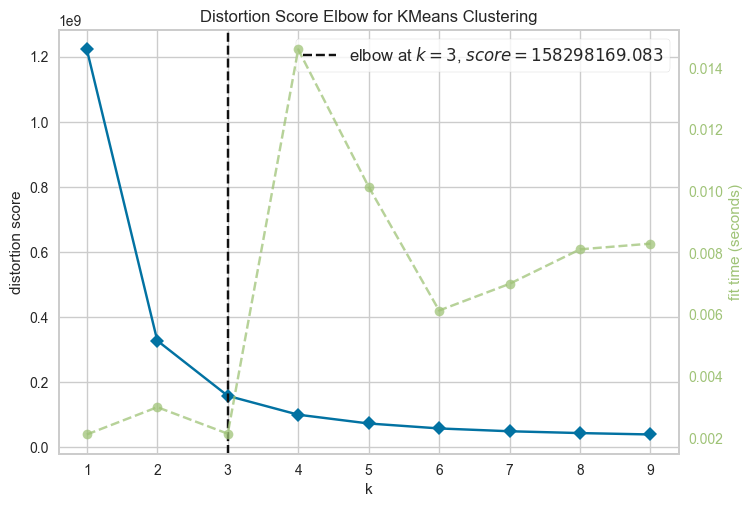

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [410]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_lencoder)
visualizer.show()

In [411]:
# Menggunakan algoritma K-Means Clustering
# Ganti <x> dengan jumlah cluster yang sudah ditentukan dari Elbow Method
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_lencoder)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


Jalankan cell code ini untuk menyimpan model kamu.

In [412]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [413]:
# Menghitung dan menampilkan nilai Silhouette Score.
from sklearn.metrics import silhouette_score
labels = kmeans.labels_
silhouette_avg = silhouette_score(df_lencoder, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5413498699383378


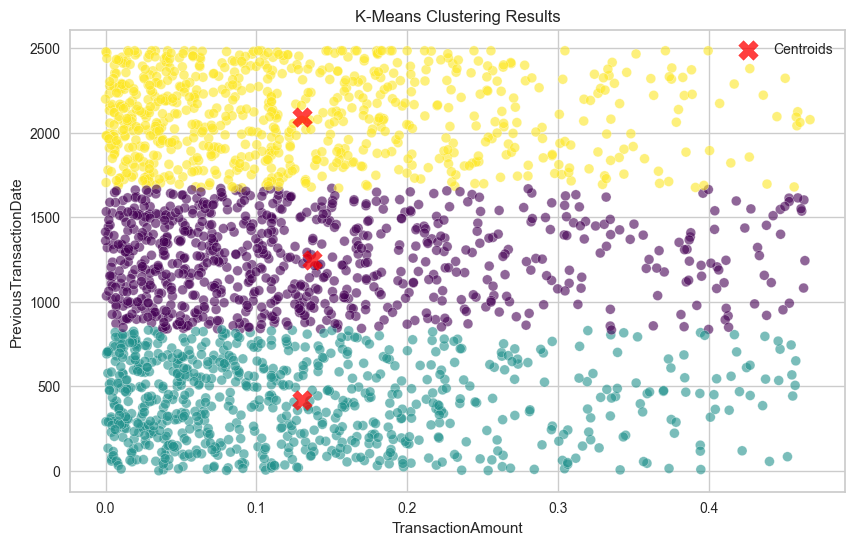

In [414]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(df_lencoder.iloc[:, 0], df_lencoder.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel(df_lencoder.columns[0])
plt.ylabel(df_lencoder.columns[1])
plt.legend()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [415]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_lencoder)
PCA_2 = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(PCA_2)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [416]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [417]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df_lencoder['Cluster'] = kmeans.labels_
hasil = df_lencoder.groupby('Cluster').agg(['mean', 'min', 'max'])
pd.set_option('display.max_columns', None)
hasil

TransactionAmount                     PreviousTransactionDate        \
                     mean       min       max                    mean   min   
Cluster                                                                       
0                0.137269  0.000031  0.463809             1249.452196   833   
1                0.130447  0.000313  0.457759              417.343915     0   
2                0.130421  0.000000  0.467223             2095.014550  1672   

              TransactionType           Location           Channel          \
          max            mean min max       mean min max      mean min max   
Cluster                                                                      
0        1671        0.788114   0   2  21.403101   0  43  0.992248   0   3   
1         834        0.805556   0   2  21.048942   0  43  0.988095   0   3   
2        2485        0.772487   0   2  21.611111   0  43  1.051587   0   3   

        CustomerAge           CustomerOccupation         TransactionDuration  \
               mean  min  max               mean min max                mean   
Cluster                                                                        
0          0.444674  0.0  1.0           1.554264   0   4            0.378687   
1          0.412229  0.0  1.0           1.515873   0   4            0.365964   
2          0.431772  0.0  1.0           1.521164   0   4            0.381682   

                       LoginAttempts           AccountBalance            \
         min       max          mean  min  max           mean       min   
Cluster                                                                   
0        0.0  0.996552           0.0  0.0  0.0       0.330543  0.001125   
1        0.0  0.996552           0.0  0.0  0.0       0.335527  0.000064   
2        0.0  1.000000           0.0  0.0  0.0       0.346267  0.000000   

                  TransactionDate          CustomerAgeBinned          
              max            mean min  max              mean min max  
Cluster                                                               
0        0.997144      177.532300   0  360          0.023256   0   1  
1        0.997633      184.109788   0  360          0.019841   0   1  
2        1.000000      180.605820   0  360          0.021164   0   1

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1 . **Cluster 0: (Nasabah Stabil & Konsisten)**:
  - **Rata-rata (mean) TransactionAmount:** 0.137269
  - **Rata-rata (mean) PreviousTransactionDate:** 1249.4521
  - **Rata-rata (mean) TransactionType:** 0.788114
  - **Rata-rata (mean) AccountBalance:** 0.330543
  - **Rata-rata (mean) CustomerAge:** 0.444674
  - **Analisis:** Nasabah di cluster ini cenderung melakukan transaksi dengan nominal sedang hingga besar, namun tidak setiap hari. Mereka memiliki saldo rata-rata yang cukup sehat, dan umumnya berada di usia produktif. Perilakunya mencerminkan konsistensi: tidak impulsif, tetapi tetap aktif menggunakan rekeningnya.


2 . **Cluster 1: (Nasabah Aktif & Transaksional (Generasi Muda))**:
  - **Rata-rata (mean) TransactionAmount:** 0.130447
  - **Rata-rata (mean) PreviousTransactionDate:** 417.343915
  - **Rata-rata (mean) TransactionType:** 0.805556
  - **Rata-rata (mean) AccountBalance:** 0.335527
  - **Rata-rata (mean) CustomerAge:** 0.412229
  - **Analisis:** Kelompok ini sangat aktif bertransaksi, meskipun dengan jumlah yang relatif kecil. Mereka tampak sering menggunakan rekening untuk keperluan sehari-hari seperti pembayaran digital, belanja online, atau transfer kecil-kecilan. Usia mereka yang relatif muda memperkuat karakter sebagai generasi digital-savvy yang lebih banyak menggunakan mobile banking.

3 .**Cluster 1: (Nasabah Pasif & Menyimpan Saldo)**:
  - **Rata-rata (mean) TransactionAmount:** 0.130421
  - **Rata-rata (mean) PreviousTransactionDate:** 2095.0145
  - **Rata-rata (mean) TransactionType:** 0.772487
  - **Rata-rata (mean) AccountBalance:** 0.346267
  - **Rata-rata (mean) CustomerAge:** 0.431772
  - **Analisis:** Nasabah di cluster ini jarang sekali bertransaksi (gap transaksi panjang), tetapi memiliki saldo rata-rata yang cukup tinggi. Mereka lebih terlihat sebagai tipe penyimpan pasif daripada pengguna aktif. Usia mereka menengah, kemungkinan sudah memiliki kondisi finansial stabil, sehingga lebih memilih menyimpan dana daripada menggunakannya untuk transaksi harian..

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [418]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_lencoder.rename(columns={'Cluster': 'Target'}, inplace=True)

In [419]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_lencoder.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [420]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()
df_inverse = df_lencoder.copy()
df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])
df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,CustomerAgeBinned,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,0,1
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,0,0
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,0,0
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,0,1
4,13.45,1939,0,1,2,45.0,3,198.0,1.0,7429.40,16,0,2


In [421]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()


In [422]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [423]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [424]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.